In [7]:
# Import necessary libraries
import pandas as pd

# Load the feature-engineered dataset from the processed folder
feature_engineered_data_path = "C:/project/Freight_Analysis_Framework-/data/processed/freight_analysis_feature_engineered.csv"
regional_data = pd.read_csv(feature_engineered_data_path)

# Check the first few rows of the dataset to ensure it loaded correctly
regional_data.head()


,fr_orig,dms_orig,dms_dest,fr_dest,dms_mode,sctg2,trade_type,tons_2012,tons_2013,tons_2014,...,fr_inmode_4.0,fr_inmode_5.0,fr_inmode_6.0,fr_inmode_7.0,fr_outmode_2.0,fr_outmode_3.0,fr_outmode_4.0,fr_outmode_5.0,fr_outmode_6.0,fr_outmode_7.0
0,804.0,11,11,801.0,1,1,1,0.3231,18.2865,19.7980,...,False,False,False,False,False,False,True,False,False,False
1,804.0,11,19,801.0,1,1,1,0.3231,218.1548,220.2783,...,False,False,False,False,False,False,True,False,False,False
2,804.0,11,129,801.0,1,1,1,0.3231,0.8870,0.8371,...,False,False,False,False,False,False,True,False,False,False
3,804.0,11,131,801.0,1,1,1,0.3231,6.5007,5.7015,...,False,False,False,False,False,False,True,False,False,False
4,804.0,11,139,801.0,1,1,1,0.3231,2.8717,2.4586,...,False,False,False,False,False,False,True,False,False,False


sctg2                                  int64
trade_type                             int64
tons_2012                            float64
tons_2013                            float64
tons_2014                            float64
tons_2015                            float64
tons_2020                            float64
tons_2025                            float64
tons_2030                            float64
tons_2035                            float64
tons_2040                            float64
tons_2045                            float64
value_2012                           float64
value_2013                           float64
value_2014                           float64
value_2015                           float64
value_2020                           float64
value_2025                           float64
value_2030                           float64
value_2035                           float64
value_2040                           float64
value_2045                           float64
tmiles_201

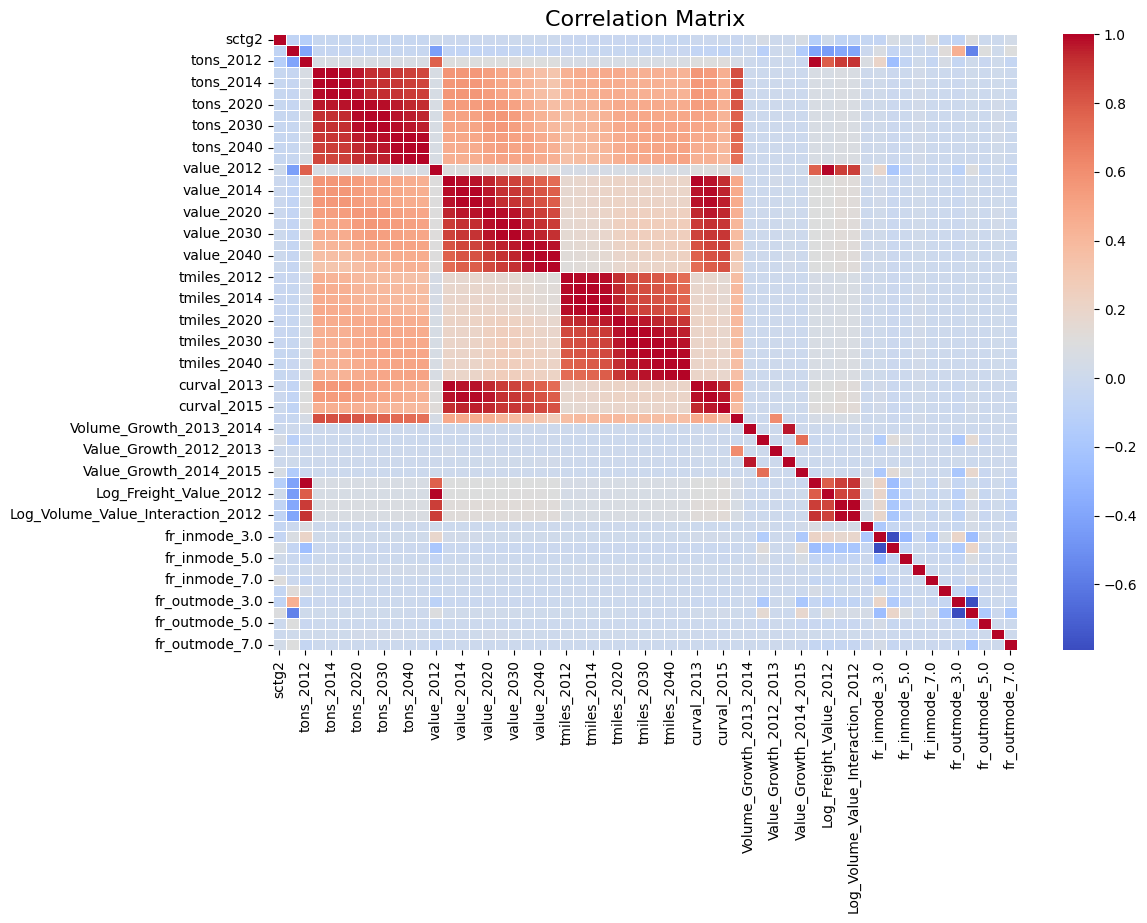

In [13]:
# One-hot encode the categorical columns 'Volume_Category_2012' and 'Value_Category_2012'
regional_data_cleaned = pd.get_dummies(regional_data_cleaned, columns=['Volume_Category_2012', 'Value_Category_2012'], drop_first=True)

# Check the data types again after encoding
print(regional_data_cleaned.dtypes)

# Now, calculate the correlation matrix
correlation_matrix = regional_data_cleaned.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, you can visualize the correlation matrix with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


Data Preview:

The dataset has been loaded successfully with 64 columns, which includes the original and feature-engineered columns.
We now have one-hot encoded columns for transport modes (fr_inmode_* and fr_outmode_*), as well as the binned categories (Volume_Category_2012 and Value_Category_2012).
Data Types:

The columns for freight volume and freight value are numerical, and the one-hot encoded columns for fr_inmode and fr_outmode are boolean (True/False).
The target variable for modeling isn't yet defined here, so we need to identify and set that

In [9]:
# Define the target variable and feature set
X = regional_data.drop(columns=['value_2012'])  # Assuming we're predicting 'value_2012'
y = regional_data['value_2012']

# Check the shapes of X and y
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


Features (X) shape: (1660972, 63)
Target (y) shape: (1660972,)


Feature Set (X):
We now have 63 features in the dataset, as expected, after excluding the target column value_2012.
Target Variable (y):
The target variable y (which is value_2012) has 1,660,972 entries, corresponding to the same number of rows in the features dataset.
Dataset Size:
The data is quite large with over 1.6 million entries, so we need to consider using efficient algorithms and techniques for training, such as random sampling, cross-validation, and grid search for hyperparameter tuning.


In [10]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()
lr_model = LinearRegression()
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

# Hyperparameter grids for each model
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

svr_param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

lasso_param_grid = {
    'alpha': [0.1, 1, 10],
}

ridge_param_grid = {
    'alpha': [0.1, 1, 10],
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV for each model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2)
svr_grid_search = GridSearchCV(estimator=svr_model, param_grid=svr_param_grid, cv=3, n_jobs=-1, verbose=2)
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid, cv=3, n_jobs=-1, verbose=2)
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the models using GridSearchCV
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)
svr_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)
ridge_grid_search.fit(X_train, y_train)
xgb_grid_search.fit(X_train, y_train)

# Get the best models and their parameters
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print("Best SVR Parameters:", svr_grid_search.best_params_)
print("Best Lasso Parameters:", lasso_grid_search.best_params_)
print("Best Ridge Parameters:", ridge_grid_search.best_params_)
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)

# Evaluate the models on the test set
rf_predictions = rf_grid_search.predict(X_test)
gb_predictions = gb_grid_search.predict(X_test)
svr_predictions = svr_grid_search.predict(X_test)
lasso_predictions = lasso_grid_search.predict(X_test)
ridge_predictions = ridge_grid_search.predict(X_test)
xgb_predictions = xgb_grid_search.predict(X_test)

# Calculate the RMSE for each model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

# Display the RMSE for each model
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Gradient Boosting RMSE: {gb_rmse}")
print(f"SVR RMSE: {svr_rmse}")
print(f"Lasso RMSE: {lasso_rmse}")
print(f"Ridge RMSE: {ridge_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits


ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\ensemble\_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\utils\validation.py", line 973, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\pandas\core\internals\blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\om\anaconda3\envs\freig\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Low'
